In [24]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('titanic.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
titanic_df = df[['Survived', 'Pclass','Sex', 'Age', 'Fare']]
titanic_df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


**The DataFrame is missing some entries for Age so we find the mean age for male and female and impute it into missing Age data**

In [7]:
female_df = titanic_df[titanic_df['Sex'] == 'female']
female_avg_age = math.floor(female_df.Age.mean())
female_avg_age

27

In [8]:
male_df = titanic_df[titanic_df['Sex'] == 'male']
male_avg_age = math.floor(male_df.Age.mean())
male_avg_age

30

In [9]:
titanic_df.loc[(titanic_df['Sex'] == 'female') & (titanic_df['Age'].isnull())]

,Survived,Pclass,Sex,Age,Fare
19,1,3,female,NaN,7.2250
28,1,3,female,NaN,7.8792
31,1,1,female,NaN,146.5208
32,1,3,female,NaN,7.7500
47,1,3,female,NaN,7.7500
82,1,3,female,NaN,7.7875
109,1,3,female,NaN,24.1500
128,1,3,female,NaN,22.3583
140,0,3,female,NaN,15.2458
166,1,1,female,NaN,55.0000


In [10]:
titanic_df.loc[(titanic_df['Sex'] == 'male') & (titanic_df['Age'].isnull())]

,Survived,Pclass,Sex,Age,Fare
5,0,3,male,NaN,8.4583
17,1,2,male,NaN,13.0000
26,0,3,male,NaN,7.2250
29,0,3,male,NaN,7.8958
36,1,3,male,NaN,7.2292
...,...,...,...,...,...
839,1,1,male,NaN,29.7000
846,0,3,male,NaN,69.5500
859,0,3,male,NaN,7.2292
868,0,3,male,NaN,9.5000


In [11]:
titanic_df.loc[(titanic_df['Sex'] == 'male') & (titanic_df['Age'].isnull()), 'Age'] = male_avg_age
titanic_df.loc[(titanic_df['Sex'] == 'female') & (titanic_df['Age'].isnull()), 'Age'] = female_avg_age

/Users/reza/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [12]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


In [13]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()

In [14]:
X = titanic_df.drop('Survived', axis='columns')
X

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,27.0,23.4500
889,1,male,26.0,30.0000


In [15]:
X['Sex_n'] = le_sex.fit_transform(X.Sex)
X

,Pclass,Sex,Age,Fare,Sex_n
0,3,male,22.0,7.2500,1
1,1,female,38.0,71.2833,0
2,3,female,26.0,7.9250,0
3,1,female,35.0,53.1000,0
4,3,male,35.0,8.0500,1
...,...,...,...,...,...
886,2,male,27.0,13.0000,1
887,1,female,19.0,30.0000,0
888,3,female,27.0,23.4500,0
889,1,male,26.0,30.0000,1


In [16]:
X = X.drop('Sex', axis='columns')
X

,Pclass,Age,Fare,Sex_n
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
888,3,27.0,23.4500,0
889,1,26.0,30.0000,1


In [17]:
y = titanic_df.Survived
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [20]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
model.score(X_test, y_test)

0.776536312849162

In [22]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[92, 12],
       [28, 47]])

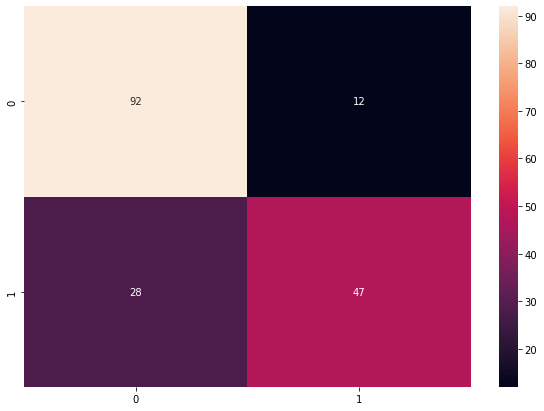

In [26]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
sn.xlabel = "Predicted"
sn.ylabel = "Truth"